## Store Sales - Time Series Forecasting
Use machine learning to predict grocery sales

## In this “getting started” competition, you’ll use time-series forecasting to forecast store sales on data from Corporación Favorita, a large Ecuadorian-based grocery retailer.

In [11]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb 
from sklearn.datasets import make_friedman1
from sklearn.preprocessing import StandardScaler

In [13]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

In [14]:
df_oil = pd.read_csv("oil.csv", index_col=0, parse_dates=[0])
df_holidays = pd.read_csv("holidays_events.csv", index_col=0, parse_dates=[0])
df_stores = pd.read_csv("stores.csv", index_col=0)
df_transactions = pd.read_csv("transactions.csv", parse_dates=[0])
df_train = pd.read_csv("train.csv", index_col=0, parse_dates=[1])
df_test = pd.read_csv("test.csv", index_col=0, parse_dates=[1])

In [15]:
df_transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [16]:
df_stores

,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
6,Quito,Pichincha,D,13
7,Quito,Pichincha,D,8
8,Quito,Pichincha,D,8
9,Quito,Pichincha,B,6


In [17]:
df_holidays

,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...
2017-12-22,Additional,National,Ecuador,Navidad-3,False
2017-12-23,Additional,National,Ecuador,Navidad-2,False
2017-12-24,Additional,National,Ecuador,Navidad-1,False


In [18]:
df_oil

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
...,...
2017-08-25,47.65
2017-08-28,46.40
2017-08-29,46.46


In [19]:
df_test

,date,store_nbr,family,onpromotion
id,,,,
3000888,2017-08-16,1,AUTOMOTIVE,0
3000889,2017-08-16,1,BABY CARE,0
3000890,2017-08-16,1,BEAUTY,2
3000891,2017-08-16,1,BEVERAGES,20
3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...
3029395,2017-08-31,9,POULTRY,1
3029396,2017-08-31,9,PREPARED FOODS,0
3029397,2017-08-31,9,PRODUCE,1


In [20]:
df_train

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148


In [21]:
df_oil['dcoilwtico'].fillna(df_oil['dcoilwtico'].median(), inplace=True)
df_oil.head()

,dcoilwtico
date,
2013-01-01,53.19
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


Text(0.5, 1.0, 'Oil Prices')

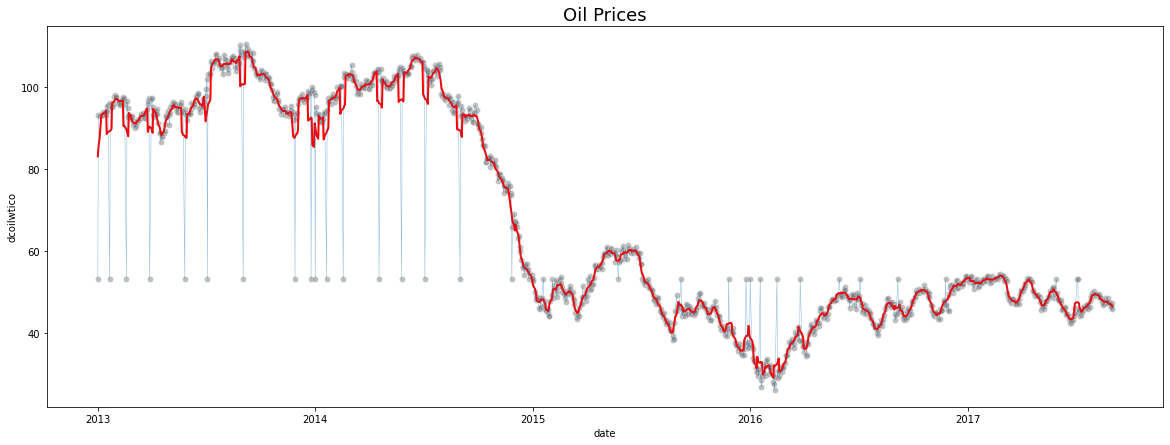

In [22]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(df_oil.rolling(window=7,
                       center=True,
                       min_periods=3).mean(),
       linewidth=2,
       color="red")
sns.scatterplot(data=df_oil, x="date", y="dcoilwtico", color="0.5", alpha=0.5, ax=ax)
sns.lineplot(data=df_oil, x="date", y="dcoilwtico", alpha=0.5, ax=ax, linewidth=0.5)
ax.set_title("Oil Prices", fontsize=18)

In [23]:
df_train_all = df_train.merge(df_oil, how='left', left_on='date', right_on = 'date')
df_train_all = df_train_all.fillna(method = 'pad')
df_train_all

,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,2013-01-01,1,AUTOMOTIVE,0.000,0,53.19
1,2013-01-01,1,BABY CARE,0.000,0,53.19
2,2013-01-01,1,BEAUTY,0.000,0,53.19
3,2013-01-01,1,BEVERAGES,0.000,0,53.19
4,2013-01-01,1,BOOKS,0.000,0,53.19
...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0,47.57
3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57
3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57


In [24]:
df_test_all = df_test.merge(df_oil, how='left', left_on='date', right_on = 'date')
df_test_all = df_test_all.fillna(method = 'pad')
df_test_all

,date,store_nbr,family,onpromotion,dcoilwtico
0,2017-08-16,1,AUTOMOTIVE,0,46.80
1,2017-08-16,1,BABY CARE,0,46.80
2,2017-08-16,1,BEAUTY,2,46.80
3,2017-08-16,1,BEVERAGES,20,46.80
4,2017-08-16,1,BOOKS,0,46.80
...,...,...,...,...,...
28507,2017-08-31,9,POULTRY,1,47.26
28508,2017-08-31,9,PREPARED FOODS,0,47.26
28509,2017-08-31,9,PRODUCE,1,47.26
28510,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,47.26


In [25]:
df_train_all = df_train_all.merge(df_stores, how='left', left_on='store_nbr', right_on = 'store_nbr')
df_train_all

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster
0,2013-01-01,1,AUTOMOTIVE,0.000,0,53.19,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.000,0,53.19,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.000,0,53.19,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.000,0,53.19,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.000,0,53.19,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6
3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6
3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Quito,Pichincha,B,6


In [26]:
df_test_all = df_test_all.merge(df_stores, how='left', left_on='store_nbr', right_on = 'store_nbr')
df_test_all

,date,store_nbr,family,onpromotion,dcoilwtico,city,state,type,cluster
0,2017-08-16,1,AUTOMOTIVE,0,46.80,Quito,Pichincha,D,13
1,2017-08-16,1,BABY CARE,0,46.80,Quito,Pichincha,D,13
2,2017-08-16,1,BEAUTY,2,46.80,Quito,Pichincha,D,13
3,2017-08-16,1,BEVERAGES,20,46.80,Quito,Pichincha,D,13
4,2017-08-16,1,BOOKS,0,46.80,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...
28507,2017-08-31,9,POULTRY,1,47.26,Quito,Pichincha,B,6
28508,2017-08-31,9,PREPARED FOODS,0,47.26,Quito,Pichincha,B,6
28509,2017-08-31,9,PRODUCE,1,47.26,Quito,Pichincha,B,6
28510,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,47.26,Quito,Pichincha,B,6


In [27]:
df_train_all = df_train_all.merge(df_holidays, how='left', left_on='date', right_on = 'date')
df_test_all = df_test_all.merge(df_holidays, how='left', left_on='date', right_on = 'date')

In [28]:
df_test_all = df_test_all.fillna('Empty')

In [29]:
df_train_all = df_train_all.fillna('Empty')

In [30]:
df_test_all["date"]= pd.to_datetime(df_test_all["date"], format='%d.%m.%Y')
df_train_all["date"]= pd.to_datetime(df_train_all["date"], format='%d.%m.%Y')

In [31]:
df_train_all["Year"] = df_train_all["date"].dt.year
df_train_all["Month"] = df_train_all["date"].dt.month
df_train_all["day"] = df_train_all["date"].dt.day
df_train_all["dayofweek"] = df_train_all["date"].dt.dayofweek

df_test_all["Year"] = df_test_all["date"].dt.year
df_test_all["Month"] = df_test_all["date"].dt.month
df_test_all["day"] = df_test_all["date"].dt.day
df_test_all["dayofweek"] = df_test_all["date"].dt.dayofweek

In [32]:
df_train_all

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,Year,Month,day,dayofweek
0,2013-01-01,1,AUTOMOTIVE,0.000,0,53.19,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1
1,2013-01-01,1,BABY CARE,0.000,0,53.19,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1
2,2013-01-01,1,BEAUTY,0.000,0,53.19,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1
3,2013-01-01,1,BEVERAGES,0.000,0,53.19,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1
4,2013-01-01,1,BOOKS,0.000,0,53.19,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2017,8,15,1
3054344,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2017,8,15,1
3054345,2017-08-15,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2017,8,15,1
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2017,8,15,1


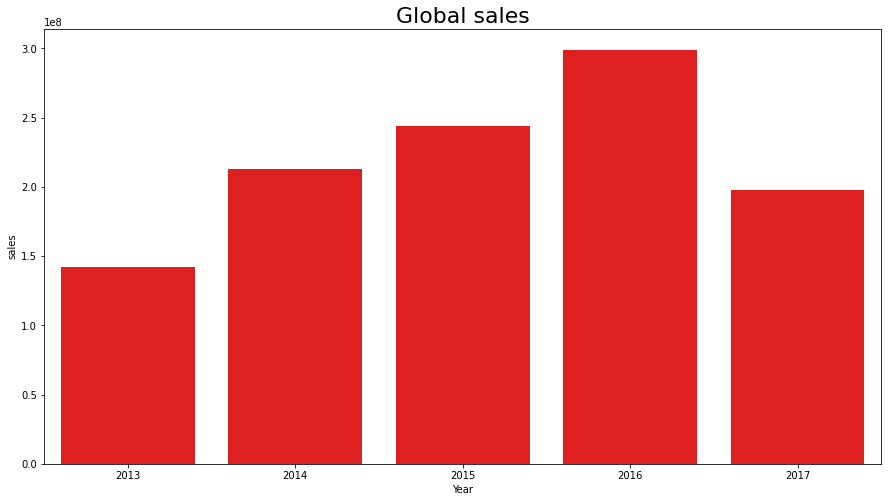

In [33]:
fig, ax = plt.subplots(figsize=(15,8))
g = df_train_all.groupby(by=['Year'])['sales'].sum().reset_index()
sns.barplot(x='Year', y='sales', data=g, color = 'red')
plt.title('Global sales', size = 22)
plt.show()

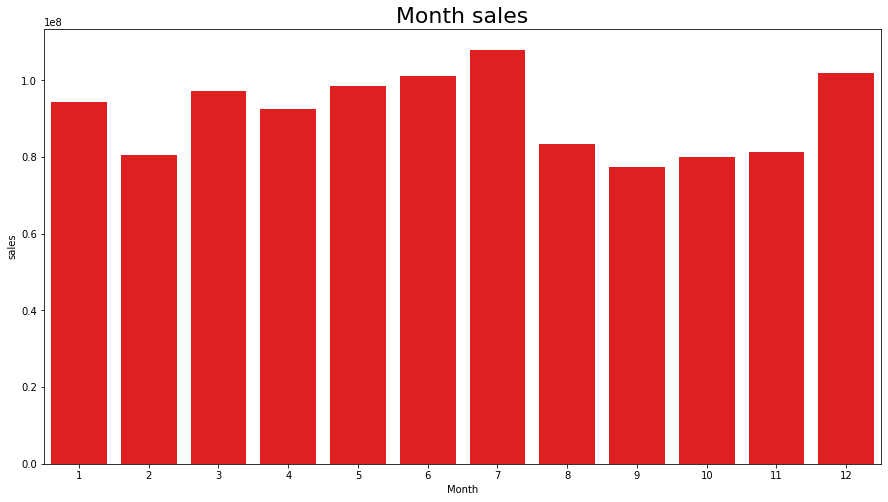

In [34]:
fig, ax = plt.subplots(figsize=(15,8))
a = df_train_all.groupby(by=['Month'])['sales'].sum().reset_index()
sns.barplot(x='Month', y='sales', data=a, color = 'red')
plt.title('Month sales', size = 22)
plt.show()

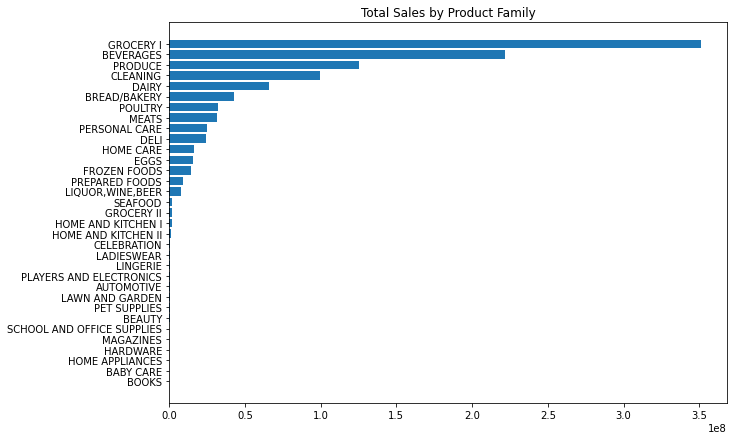

In [35]:
month_family = df_train_all.groupby('family').sales.sum() #resample to monthly sales 

fig, ax = plt.subplots(figsize=(10,7))
plt.barh(month_family.groupby('family').sum().sort_values().index,month_family.groupby('family').sum().sort_values())
ax.set(title='Total Sales by Product Family')
plt.show()

In [36]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

/usr/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/usr/local/lib/python3.7/dist-packages/wordcloud/wordcloud.py:30: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/wordcloud/stopwords' mode='r' encoding='UTF-8'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))


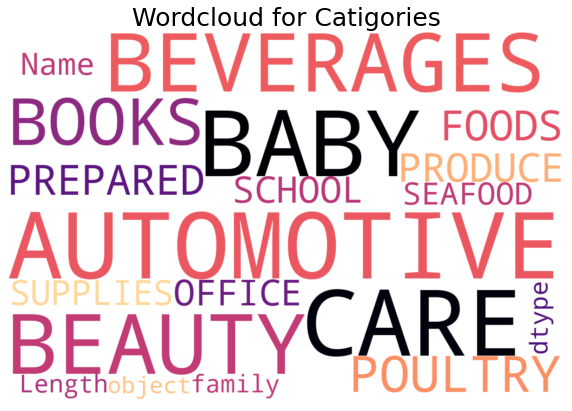

In [37]:
plt.rcParams['figure.figsize'] = (10, 10)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white',
                      colormap='magma',
                      max_words = 100, 
                      stopwords = stopwords ,
                      width = 1200,
                      height = 800,
                     random_state = 30).generate(str(df_train_all['family']))


plt.title('Wordcloud for Catigories', fontsize = 25)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/squarify-0.4.3.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


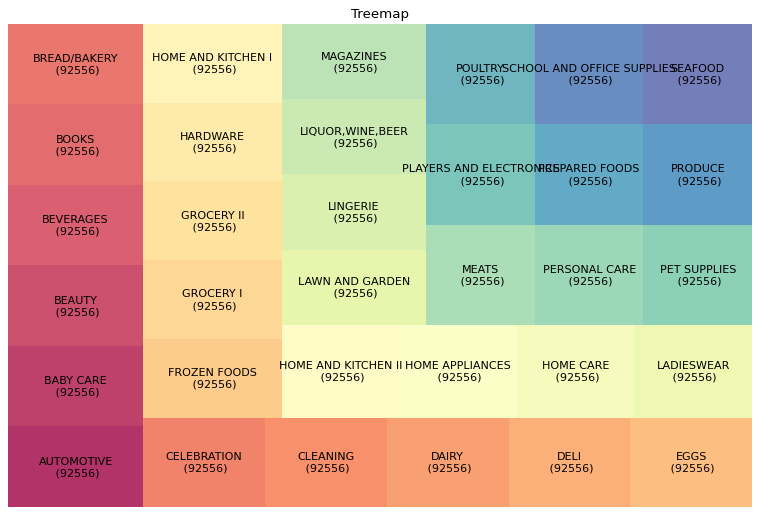

In [38]:
!pip install squarify
import squarify 
# Prepare Data
df = df_train_all.groupby('family').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap')
plt.axis('off')
plt.show()

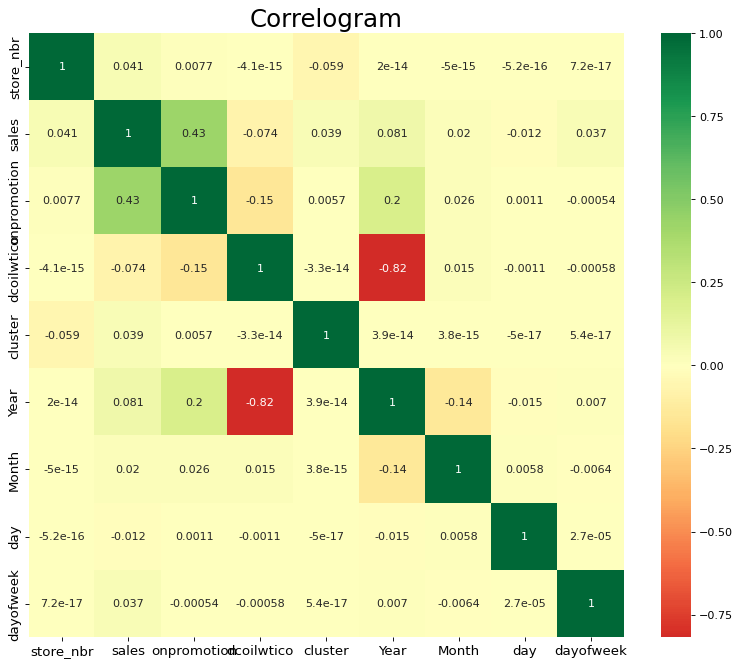

In [39]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df_train_all.corr(), xticklabels=df_train_all.corr().columns, yticklabels=df_train_all.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [40]:
df_train_all.rename(columns = {'type_x' : 'holiday_type', 'type_y' : 'shop_type'}, inplace = True)
df_test_all.rename(columns = {'type_x' : 'holiday_type', 'type_y' : 'shop_type'}, inplace = True)

In [41]:
from sklearn.preprocessing import LabelEncoder

encoder_family = LabelEncoder()
df_train_all['family'] = encoder_family.fit_transform(df_train_all['family'])
df_test_all['family'] = encoder_family.transform(df_test_all['family'])

encoder_type = LabelEncoder()
df_train_all['holiday_type'] = encoder_type.fit_transform(df_train_all['holiday_type'])
df_test_all['holiday_type'] = encoder_type.transform(df_test_all['holiday_type'])

encoder_locale = LabelEncoder()
df_train_all['locale'] = encoder_locale.fit_transform(df_train_all['locale'])
df_test_all['locale'] = encoder_locale.transform(df_test_all['locale'])

encoder_description = LabelEncoder()
df_train_all['description'] = encoder_description.fit_transform(df_train_all['description'])
df_test_all['description'] = encoder_description.transform(df_test_all['description'])

encoder_locale_name = LabelEncoder()
df_train_all['locale_name'] = encoder_locale_name.fit_transform(df_train_all['locale_name'])
df_test_all['locale_name'] = encoder_locale_name.transform(df_test_all['locale_name'])

encoder_city = LabelEncoder()
df_train_all['city'] = encoder_city.fit_transform(df_train_all['city'])
df_test_all['city'] = encoder_city.transform(df_test_all['city'])

encoder_state = LabelEncoder()
df_train_all['state'] = encoder_state.fit_transform(df_train_all['state'])
df_test_all['state'] = encoder_state.transform(df_test_all['state'])

encoder_shop_type = LabelEncoder()
df_train_all['shop_type'] = encoder_shop_type.fit_transform(df_train_all['shop_type'])
df_test_all['shop_type'] = encoder_shop_type.transform(df_test_all['shop_type'])

df_train_all = df_train_all.drop(['transferred'], axis = 1)
df_test_all = df_test_all.drop(['transferred'], axis =1)


In [42]:
df_test_all = df_test_all.drop(['date'], axis =1)
df_train_all = df_train_all.drop(['date'], axis =1)
df_test_all

,store_nbr,family,onpromotion,dcoilwtico,city,state,holiday_type,cluster,shop_type,locale,locale_name,description,Year,Month,day,dayofweek
0,1,0,0,46.80,18,12,3,13,2,0,6,17,2017,8,16,2
1,1,1,0,46.80,18,12,3,13,2,0,6,17,2017,8,16,2
2,1,2,2,46.80,18,12,3,13,2,0,6,17,2017,8,16,2
3,1,3,20,46.80,18,12,3,13,2,0,6,17,2017,8,16,2
4,1,4,0,46.80,18,12,3,13,2,0,6,17,2017,8,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,9,28,1,47.26,18,12,1,6,2,0,6,17,2017,8,31,3
28508,9,29,0,47.26,18,12,1,6,2,0,6,17,2017,8,31,3
28509,9,30,1,47.26,18,12,1,6,2,0,6,17,2017,8,31,3
28510,9,31,9,47.26,18,12,1,6,2,0,6,17,2017,8,31,3


In [43]:
data = df_train_all.drop(columns = 'sales')
target = df_train_all['sales']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, train_size = 0.8, random_state = 5)

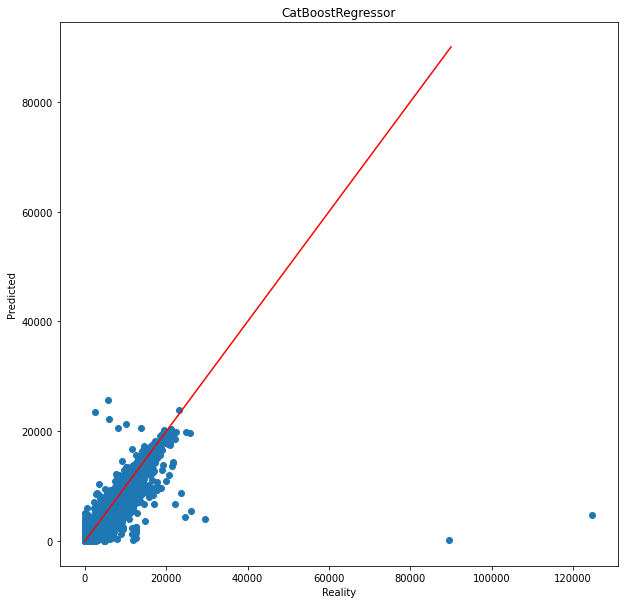

0.9372611357950609


<Figure size 720x720 with 0 Axes>

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
XG = xgb.XGBRegressor(objective = 'reg:squarederror' , learning_rate = 0.1,
                      max_depth = 10, n_estimators = 300).fit(x_train, y_train)
y_pred_XG = XG.predict(x_test)
def relu(x):
    relu = []
    for i in x: 
        if i < 0:
            relu.append(0)
        else:
            relu.append(i)
    return relu

plt.scatter(y_test, relu(y_pred_XG))
plt.plot([10000*x for x in range(10)], [10000*x for x in range(10)], color = 'r')
plt.xlabel("Reality")
plt.ylabel("Predicted")
plt.title('CatBoostRegressor')
plt.show()
plt.clf()
print(XG.score(x_test, y_test))

In [52]:
sample_submission = pd.read_csv('sample_submission.csv')
sub = XG.predict(df_test_all)
sample_submission['sales'] = relu(sub)
sample_submission.to_csv('submission.csv', index=False)

In [53]:
from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>